In [1]:
import os
import pandas as pd
import json
pd.set_option('display.max_columns', None)  # Configura para mostrar todas las columnas


In [2]:
datos_csv = pd.read_csv("empleadosTecnologiaAlpes.csv", sep=";", encoding="latin-1")
datos_csv.head()


,Edad,Retirado,ViajesDeNegocio,TarifaSalarial,Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,Genero,SalarioPorHora,NivelInvolucramiento,NivelResponsabilidad,Rol,SatisfaccionTrabajo,EstadoCivil,SalarioMensual,TarifaMensual,NumEmpresasDondeTrabaja,MasDe18Horas,HorasExtra,PorcentajeIncrementoSalarioUltimoAnnio,NivelRendimiento,SatisfaccionEmpresa,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
0,41,Si,Viaja-Pocas-Veces,1102,Ventas,1,2,Ciencias de la vida,1.0,1,2,Femenino,94,3,2,Ejecutivo de ventas,4,Soltero,5993,19479,8,S,Si,11,3,1,80,0,8,0,1,26/07/2015,6,4,0,5
1,49,No,Viaja-Frecuentemente,279,Investigacion & Desarrollo,8,1,Ciencias de la vida,1.0,2,3,Masculino,61,2,2,Cientifico de investigacion,2,Casado,5130,24907,1,S,No,23,4,4,80,1,10,3,3,15/02/2011,10,7,1,7
2,37,Si,Viaja-Pocas-Veces,1373,Investigacion & Desarrollo,2,2,Otro,1.0,4,4,Masculino,92,2,1,Tecnico de laboratorio,3,Soltero,2090,2396,6,S,Si,15,3,2,80,0,7,3,3,2/06/2021,0,0,0,0
3,33,No,Viaja-Frecuentemente,1392,Investigacion & Desarrollo,3,4,Ciencias de la vida,1.0,5,4,Femenino,56,3,1,Cientifico de investigacion,3,Casado,2909,23159,1,S,Si,11,3,3,80,0,8,3,3,26/09/2013,8,7,3,0
4,27,No,Viaja-Pocas-Veces,591,Investigacion & Desarrollo,2,1,Medicina,1.0,7,1,Masculino,40,3,1,Tecnico de laboratorio,2,Casado,3468,16632,9,S,No,12,3,4,80,1,6,3,3,2/03/2019,2,2,2,2


In [3]:
datos_csv.shape

(1492, 36)

In [4]:
datos_csv.dtypes

Edad                                        int64
Retirado                                   object
ViajesDeNegocio                            object
TarifaSalarial                              int64
Departamento                               object
DistanciaDesdeCasa                          int64
Educacion                                   int64
CampoEducacion                             object
EmpleadosACargo                           float64
NumeroEmpleado                              int64
NivelSatisfaccion                           int64
Genero                                     object
SalarioPorHora                              int64
NivelInvolucramiento                        int64
NivelResponsabilidad                        int64
Rol                                        object
SatisfaccionTrabajo                         int64
EstadoCivil                                object
SalarioMensual                              int64
TarifaMensual                               int64


In [5]:
datos_excel = pd.read_excel("empleadosTecnologiaAlpesMod3y4.xlsx", sheet_name="Departamentos")
datos_excel.head()

# cuando se llaman datos de excel con sheet_name se define el nombre de la hoja a seleccionar

,ID,Departamento
0,1,Investigacion & Desarrollo
1,2,Talento Humano
2,3,Ventas


Cuando se desea leer un archivo de excel y queremos ser eficientes con el tiempo, podemos utilizar 
**pd.ExcelFile**
import pandas as pd

#Abrir el archivo Excel
excel_file = pd.ExcelFile('datos.xlsx')

#Leer una hoja específica del archivo Excel
df1 = excel_file.parse(sheet_name='Hoja1')

#Leer otra hoja del mismo archivo Excel
df2 = excel_file.parse(sheet_name='Hoja2')



In [6]:
datos_csv["FechaIngresoEmpresa"] = pd.to_datetime(datos_csv["FechaIngresoEmpresa"], format="%d/%m/%Y")
datos_csv["FechaIngresoEmpresa"].dt.day

0       26
1       15
2        2
3       26
4        2
        ..
1487    14
1488     5
1489    28
1490    16
1491    28
Name: FechaIngresoEmpresa, Length: 1492, dtype: int64

In [7]:
# leer archivo json usando request

import requests

url = "https://d3c33hcgiwev3.cloudfront.net/y77IS9YOS-G-yEvWDuvhZg_db4d4ea50e4a4a22b765254b1d7827f1_ordenes_por_producto.json?Expires=1689638400&Signature=FdMCY1lpYH9oq0lmi4VJeE7i7k9BAGUAyKQNeLtjdn2XWnCZ4HbiWJzuyB4MQRUu5j9zq~LKUp30--K5DbPJpF9u7H~QRGCrioARVvBo6H~5I~iLtXO2lpK9mqOL~V29DiyjPH1EPqGGilhwWAY2MXxFKAB0BS1SshHuLwgQN2Y_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A"

# hacer solicitud GET para obtener el archivo json

response = requests.get(url)

# verificar como responde la solicitud

if response.status_code == 200:
    # si da 200 es que puede entrar
    datos = response.json()
    print(datos)
else:
    print("fallo la conexión, no se pudo generar archivo json")

In [8]:
#datos.keys()

In [9]:
# como ver una llave

#dict(list(datos["orden_id"].items())[0:5])

In [10]:
#datos_json = pd.DataFrame(datos)

In [11]:
#datos_json

## Perfilamiento de datos.

1) Verificar patrones. 
2) Diferencia entre los datos y la realidad de los mismos 

In [12]:
datos_fecha = pd.read_csv("productos_por_fecha.csv", sep=";", encoding="latin-1")
datos_fecha.head()

,producto_id,fecha_envio_limite,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,PT66,19/09/2017 07:24,Tarjetas regalo,6,34,18,50,9,12
1,PB76,22/01/2018 11:30,Ropa de adultos,10,39,0,26,24,23
2,PJ55,09/12/2017 15:09,Mascotas,25,12,3,51,2,28
3,PO85,04/05/2018 04:15,Productos ecoamigables,33,25,25,19,26,28
4,PG31,17/09/2017 23:24,Salud,34,22,11,39,19,40


In [13]:
datos_ordenes = pd.read_csv("ordenes_por_producto.csv", sep=";", encoding="latin-1")
datos_ordenes.head()

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,88176PT66A,A,PT66,VE3877,19/09/2017 07:24,226.31,2.86,11001,Bogota d.c.,Bogota d.c.,Tarjetas regalo,6,34,18,6291,50,9,12
1,61602PB76A,A,PB76,VE8568,22/01/2018 11:30,338.38,3.28,27001,Quibdo,Choco,Ropa de adultos,10,39,0,616,26,24,23
2,106573PJ55A,A,PJ55,VE4333,09/12/2017 15:09,155.29,11.48,70001,Sincelejo,Sucre,Mascotas,25,12,3,2431,51,2,28
3,15563PO85A,A,PO85,VE7960,04/05/2018 04:15,137.82,25.39,85001,Yopal,Casanare,Productos ecoamigables,33,25,25,2061,19,26,28
4,11468PG31A,A,PG31,VE1019,17/09/2017 23:24,141.90,22.94,52480,Nariño,Nariño,Salud,34,22,11,2639,39,19,40


In [14]:
datos_ordenes.shape

(10000, 18)

In [15]:
datos_ordenes["orden_id"].isnull().sum()

0

In [16]:
datos_ordenes["orden_id"].duplicated().sum() # se observan los duplicados par ala columna orden id

4

In [17]:
datos_ordenes[datos_ordenes.duplicated("orden_id")].head()

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
2094,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52480,Nariño,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
5614,107500PO59A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,70001,Sincelejo,Sucre,Frutas y verduras,23,16,35,884,45,26,18
6669,107500PO59A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,54003,Abrego,Norte de santander,Electrodomésticos,10,1,6,734,46,48,22
9398,107500PO59A,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,52506,Ospina,Nariño,Deportes,25,5,4,5270,9,27,29


In [18]:
# como vemos hay elementos que si bien la orden_id esta duplicada hay otros elementos que no se duplican, por lo cual
# debemos corroborar con el dataframe completo

datos_ordenes[datos_ordenes.duplicated()].count()

orden_id                         0
order_item_id                    0
producto_id                      0
vendedor_id                      0
fecha_envio_limite               0
precio                           0
valor_flete                      0
codigo_postal_vendedor           0
ciudad_vendedor                  0
departamento_vendedor            0
nombre_categoria_producto        0
longitud_nombre_producto         0
longitud_descripcion_producto    0
cantidad_fotos_producto          0
peso_g_producto                  0
longitud_cm_producto             0
altura_cm_producto               0
ancho_cm_producto                0
dtype: int64

In [19]:
datos_ordenes["order_item_id"].duplicated().sum()

9986

In [20]:
datos_ordenes["precio"].min()

0.01

In [21]:
datos_ordenes["precio"].max()

1262.94

Caso de extensión
Con el archivo de productos_por_fecha en el cual se encuentran los productos que se han vendido por fecha, además de realizar los siguientes puntos para el archivo dado, contempla cuál sería el problema para el negocio con los problemas identificados

* Revisa cuántos registros y atributos tiene la fuente de datos.
* Revisa el identificador único de la fuente de datos.
* Valida cuántos datos están duplicados en la fuente de datos.
* Revisa qué tipos de datos trae la fuente de datos.
* Identifica el dominio para los atributos de volumen, altura, anchura y largo del producto.
* Identifica el patrón de la fecha que se presenta en el archivo.
* Encuentra los valores vacíos. Con el uso de estadística muestra dónde existen posibles errores en los datos.
* Identifica qué problemas se presentan con el volumen de los productos.
* Encuentra los valores de las categorías para el nombre_categoria_producto.
* Genera un reporte de perfilamiento de datos.

In [22]:
datos = pd.read_csv("productos_por_fecha.csv", sep=";" ,encoding="latin-1")
datos

,producto_id,fecha_envio_limite,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,PT66,19/09/2017 07:24,Tarjetas regalo,6,34,18,50,9,12
1,PB76,22/01/2018 11:30,Ropa de adultos,10,39,0,26,24,23
2,PJ55,09/12/2017 15:09,Mascotas,25,12,3,51,2,28
3,PO85,04/05/2018 04:15,Productos ecoamigables,33,25,25,19,26,28
4,PG31,17/09/2017 23:24,Salud,34,22,11,39,19,40
...,...,...,...,...,...,...,...,...,...
995,PF22,24/02/2018 02:58,Muebles,37,5,4,14,6,27
996,PI26,10/02/2018 22:42,Juguetes,30,3,26,40,30,22
997,PI28,07/08/2017 03:24,Juguetes,35,37,11,17,17,10
998,PS62,19/12/2017 00:54,Carnicería,21,39,36,47,27,12


In [23]:
datos.shape

(1000, 9)

In [24]:
# revisando el clasificador unico

datos["producto_id"].duplicated().sum()

248

In [25]:
# de maenra previa vemos que en el identificador hay datos repetidos, pero hay que confirmar cuantos datos existen
# repetidos dentro del registro completdao

datos[datos.duplicated()].count()

producto_id                      0
fecha_envio_limite               0
nombre_categoria_producto        0
longitud_nombre_producto         0
longitud_descripcion_producto    0
cantidad_fotos_producto          0
longitud_cm_producto             0
altura_cm_producto               0
ancho_cm_producto                0
dtype: int64

Se observa que si bien hay un identificador con productos duplicados, esto no quiere decir que todos sean duplicados en las columnas, vamos a verificar esto.

In [26]:
datos[datos["producto_id"].duplicated()]

,producto_id,fecha_envio_limite,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
71,PI33,27/05/2018 14:06,Juguetes,29,38,40,15,14,16
109,PT66,28/05/2018 04:57,Tarjetas regalo,18,10,12,18,1,15
118,PR58,24/03/2018 22:25,Frutas y verduras,33,0,28,24,9,47
124,PI33,14/08/2017 23:23,Juguetes,4,22,24,51,30,32
134,PO44,16/06/2018 00:26,Productos ecoamigables,33,23,12,22,18,22
...,...,...,...,...,...,...,...,...,...
989,PP19,25/10/2017 17:07,Licor,7,12,32,38,6,19
990,PF97,30/04/2018 07:27,Muebles,13,38,35,2,28,15
992,PH32,22/11/2017 04:25,Bebés,21,40,9,30,21,40
996,PI26,10/02/2018 22:42,Juguetes,30,3,26,40,30,22


In [27]:
datos.isna().sum()

producto_id                      0
fecha_envio_limite               0
nombre_categoria_producto        0
longitud_nombre_producto         0
longitud_descripcion_producto    0
cantidad_fotos_producto          0
longitud_cm_producto             0
altura_cm_producto               0
ancho_cm_producto                0
dtype: int64

In [28]:
datos.dtypes

producto_id                      object
fecha_envio_limite               object
nombre_categoria_producto        object
longitud_nombre_producto          int64
longitud_descripcion_producto     int64
cantidad_fotos_producto           int64
longitud_cm_producto              int64
altura_cm_producto                int64
ancho_cm_producto                 int64
dtype: object

In [29]:
# verificando medidas de volumen

datos["volumen_m3"] = datos["longitud_cm_producto"] * datos["altura_cm_producto"] * datos["ancho_cm_producto"]
datos.head(4)

,producto_id,fecha_envio_limite,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,volumen_m3
0,PT66,19/09/2017 07:24,Tarjetas regalo,6,34,18,50,9,12,5400
1,PB76,22/01/2018 11:30,Ropa de adultos,10,39,0,26,24,23,14352
2,PJ55,09/12/2017 15:09,Mascotas,25,12,3,51,2,28,2856
3,PO85,04/05/2018 04:15,Productos ecoamigables,33,25,25,19,26,28,13832


In [30]:
datos_medidas = datos.loc[:,["longitud_cm_producto","altura_cm_producto","ancho_cm_producto","volumen_m3"]]

In [31]:
datos_medidas[datos_medidas.volumen_m3 <= 0]

,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,volumen_m3
75,52,0,9,0
81,32,0,23,0
130,74,14,0,0
136,0,30,26,0
249,0,17,50,0
254,21,0,20,0
259,0,10,25,0
279,48,0,7,0
338,22,0,21,0
396,10,0,1,0


In [32]:
a = datos_medidas[datos_medidas.volumen_m3 <= 0]["volumen_m3"].count()
a

27

En la verificación de los datos se observa que hay un volumen de 0 lo cual puede ser un error, porque las medidas deben tener siempre alguna medida especifica, asi sea un sobre. 

In [33]:
datos.fecha_envio_limite.value_counts()

30/09/2017 10:32    2
19/09/2017 07:24    1
21/08/2017 22:02    1
05/10/2017 22:13    1
25/09/2017 19:36    1
                   ..
28/01/2018 08:41    1
25/04/2018 16:28    1
16/02/2018 19:45    1
14/01/2018 06:52    1
08/04/2018 18:38    1
Name: fecha_envio_limite, Length: 999, dtype: int64

In [34]:
datos["fecha"] = pd.to_datetime(datos["fecha_envio_limite"])
datos["fecha"].head()

0   2017-09-19 07:24:00
1   2018-01-22 11:30:00
2   2017-09-12 15:09:00
3   2018-04-05 04:15:00
4   2017-09-17 23:24:00
Name: fecha, dtype: datetime64[ns]

In [35]:
datos.fecha.dt.month.value_counts()

1     95
8     93
4     90
7     89
9     87
5     86
2     85
11    83
12    80
10    76
6     69
3     67
Name: fecha, dtype: int64

In [36]:
datos["nombre_categoria_producto"].unique()

array(['Tarjetas regalo', 'Ropa de adultos', 'Mascotas',
       'Productos ecoamigables', 'Salud', 'Ropa infantil', 'Deportes',
       'Dormitorio', 'Celulares', 'Ferretería', 'Libros', 'Tecnología',
       'Bebés\xa0', 'Licor', 'Electrodomésticos', 'Juguetes', 'Lácteos',
       'Frutas y verduras', 'Muebles', 'Carnicería'], dtype=object)

Existe categoría de ropa infantil y de bebés pero es raro esa categoría bebés, no sé si hay un error ahi.

In [37]:
datos[datos["nombre_categoria_producto"]=="Bebés\xa0"]

,producto_id,fecha_envio_limite,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,volumen_m3,fecha
13,PH88,05/11/2017 21:43,Bebés,10,36,17,3,15,10,450,2017-05-11 21:43:00
36,PH66,07/01/2018 06:51,Bebés,25,13,17,31,14,22,9548,2018-07-01 06:51:00
55,PH36,14/12/2017 17:47,Bebés,29,34,9,14,6,17,1428,2017-12-14 17:47:00
94,PH82,08/12/2017 14:35,Bebés,6,3,12,20,30,23,13800,2017-08-12 14:35:00
111,PH17,30/11/2017 10:11,Bebés,4,34,2,20,27,34,18360,2017-11-30 10:11:00
165,PH70,01/02/2018 11:28,Bebés,9,5,0,13,17,16,3536,2018-01-02 11:28:00
195,PH72,29/11/2017 14:29,Bebés,0,25,6,37,27,32,31968,2017-11-29 14:29:00
202,PH34,31/07/2017 01:31,Bebés,14,25,30,6,1,22,132,2017-07-31 01:31:00
212,PH69,12/09/2017 01:33,Bebés,34,3,34,41,25,5,5125,2017-12-09 01:33:00
241,PH95,30/05/2018 15:03,Bebés,27,19,16,54,10,12,6480,2018-05-30 15:03:00


In [38]:
import matplotlib.pyplot as plt

In [39]:
datos.dtypes

producto_id                              object
fecha_envio_limite                       object
nombre_categoria_producto                object
longitud_nombre_producto                  int64
longitud_descripcion_producto             int64
cantidad_fotos_producto                   int64
longitud_cm_producto                      int64
altura_cm_producto                        int64
ancho_cm_producto                         int64
volumen_m3                                int64
fecha                            datetime64[ns]
dtype: object

(array([ 48.,  27.,  90., 163., 161., 162., 149., 123.,  31.,  46.]),
 array([17174.03263889, 17243.824375  , 17313.61611111, 17383.40784722,
        17453.19958333, 17522.99131944, 17592.78305556, 17662.57479167,
        17732.36652778, 17802.15826389, 17871.95      ]),
 <BarContainer object of 10 artists>)

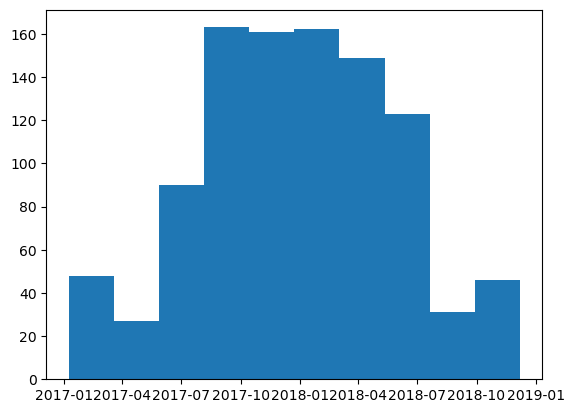

In [40]:
plt.hist(datos["fecha"])

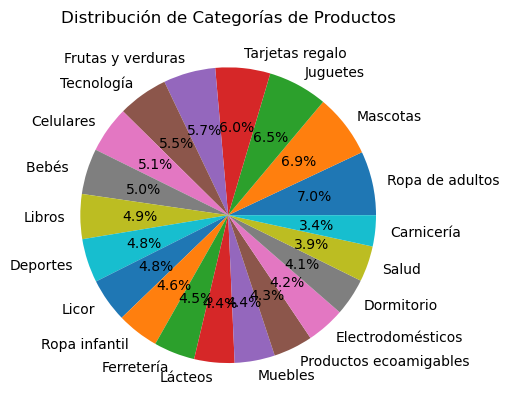

In [41]:

conteo_categorias = datos["nombre_categoria_producto"].value_counts()

# Graficar el gráfico de pastel
plt.pie(conteo_categorias.values, labels=conteo_categorias.index, autopct='%1.1f%%')
plt.title('Distribución de Categorías de Productos')

# Mostrar el gráfico
plt.show()


In [42]:
conteo_categorias.index

Index(['Ropa de adultos', 'Mascotas', 'Juguetes', 'Tarjetas regalo',
       'Frutas y verduras', 'Tecnología', 'Celulares', 'Bebés ', 'Libros',
       'Deportes', 'Licor', 'Ropa infantil', 'Ferretería', 'Lácteos',
       'Muebles', 'Productos ecoamigables', 'Electrodomésticos', 'Dormitorio',
       'Salud', 'Carnicería'],
      dtype='object')

In [43]:
datos['nombre_categoria_producto'].value_counts()

Ropa de adultos           70
Mascotas                  69
Juguetes                  65
Tarjetas regalo           60
Frutas y verduras         57
Tecnología                55
Celulares                 51
Bebés                     50
Libros                    49
Deportes                  48
Licor                     48
Ropa infantil             46
Ferretería                45
Lácteos                   44
Muebles                   44
Productos ecoamigables    43
Electrodomésticos         42
Dormitorio                41
Salud                     39
Carnicería                34
Name: nombre_categoria_producto, dtype: int64

In [44]:
df = pd.read_csv("empleadosTecnologiaAlpes.csv", sep=";", encoding="latin-1")

In [45]:
df.head()

,Edad,Retirado,ViajesDeNegocio,TarifaSalarial,Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,Genero,SalarioPorHora,NivelInvolucramiento,NivelResponsabilidad,Rol,SatisfaccionTrabajo,EstadoCivil,SalarioMensual,TarifaMensual,NumEmpresasDondeTrabaja,MasDe18Horas,HorasExtra,PorcentajeIncrementoSalarioUltimoAnnio,NivelRendimiento,SatisfaccionEmpresa,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
0,41,Si,Viaja-Pocas-Veces,1102,Ventas,1,2,Ciencias de la vida,1.0,1,2,Femenino,94,3,2,Ejecutivo de ventas,4,Soltero,5993,19479,8,S,Si,11,3,1,80,0,8,0,1,26/07/2015,6,4,0,5
1,49,No,Viaja-Frecuentemente,279,Investigacion & Desarrollo,8,1,Ciencias de la vida,1.0,2,3,Masculino,61,2,2,Cientifico de investigacion,2,Casado,5130,24907,1,S,No,23,4,4,80,1,10,3,3,15/02/2011,10,7,1,7
2,37,Si,Viaja-Pocas-Veces,1373,Investigacion & Desarrollo,2,2,Otro,1.0,4,4,Masculino,92,2,1,Tecnico de laboratorio,3,Soltero,2090,2396,6,S,Si,15,3,2,80,0,7,3,3,2/06/2021,0,0,0,0
3,33,No,Viaja-Frecuentemente,1392,Investigacion & Desarrollo,3,4,Ciencias de la vida,1.0,5,4,Femenino,56,3,1,Cientifico de investigacion,3,Casado,2909,23159,1,S,Si,11,3,3,80,0,8,3,3,26/09/2013,8,7,3,0
4,27,No,Viaja-Pocas-Veces,591,Investigacion & Desarrollo,2,1,Medicina,1.0,7,1,Masculino,40,3,1,Tecnico de laboratorio,2,Casado,3468,16632,9,S,No,12,3,4,80,1,6,3,3,2/03/2019,2,2,2,2


In [46]:
df.dtypes

Edad                                        int64
Retirado                                   object
ViajesDeNegocio                            object
TarifaSalarial                              int64
Departamento                               object
DistanciaDesdeCasa                          int64
Educacion                                   int64
CampoEducacion                             object
EmpleadosACargo                           float64
NumeroEmpleado                              int64
NivelSatisfaccion                           int64
Genero                                     object
SalarioPorHora                              int64
NivelInvolucramiento                        int64
NivelResponsabilidad                        int64
Rol                                        object
SatisfaccionTrabajo                         int64
EstadoCivil                                object
SalarioMensual                              int64
TarifaMensual                               int64


In [47]:
df.shape

(1492, 36)

In [48]:
print(df.isna().sum())


Edad                                       0
Retirado                                   0
ViajesDeNegocio                            0
TarifaSalarial                             0
Departamento                               0
DistanciaDesdeCasa                         0
Educacion                                  0
CampoEducacion                             0
EmpleadosACargo                           20
NumeroEmpleado                             0
NivelSatisfaccion                          0
Genero                                     7
SalarioPorHora                             0
NivelInvolucramiento                       0
NivelResponsabilidad                       0
Rol                                        0
SatisfaccionTrabajo                        0
EstadoCivil                               10
SalarioMensual                             0
TarifaMensual                              0
NumEmpresasDondeTrabaja                    0
MasDe18Horas                               0
HorasExtra

In [49]:
print((df.isna().sum() / len(df)))

Edad                                      0.000000
Retirado                                  0.000000
ViajesDeNegocio                           0.000000
TarifaSalarial                            0.000000
Departamento                              0.000000
DistanciaDesdeCasa                        0.000000
Educacion                                 0.000000
CampoEducacion                            0.000000
EmpleadosACargo                           0.013405
NumeroEmpleado                            0.000000
NivelSatisfaccion                         0.000000
Genero                                    0.004692
SalarioPorHora                            0.000000
NivelInvolucramiento                      0.000000
NivelResponsabilidad                      0.000000
Rol                                       0.000000
SatisfaccionTrabajo                       0.000000
EstadoCivil                               0.006702
SalarioMensual                            0.000000
TarifaMensual                  

In [50]:
# como el porcentaje de datos es pequeño los eliminaremos.

df_limpios = df.dropna()

In [51]:
# vemos datos duplicados

df_limpios.duplicated().sum()

21

In [52]:
# existen datos duplicados que hay que, pero primero vamos a verificarlosp


df_limpios.duplicated(keep="first")

0       False
1       False
2       False
3       False
4       False
        ...  
1487     True
1488     True
1489    False
1490     True
1491     True
Length: 1465, dtype: bool

In [53]:
df_limpios.shape

(1465, 36)

In [54]:
(df_limpios.duplicated(keep='first'))

0       False
1       False
2       False
3       False
4       False
        ...  
1487     True
1488     True
1489    False
1490     True
1491     True
Length: 1465, dtype: bool

In [55]:
df_limpios.loc[[1487,1488 ]]

,Edad,Retirado,ViajesDeNegocio,TarifaSalarial,Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,Genero,SalarioPorHora,NivelInvolucramiento,NivelResponsabilidad,Rol,SatisfaccionTrabajo,EstadoCivil,SalarioMensual,TarifaMensual,NumEmpresasDondeTrabaja,MasDe18Horas,HorasExtra,PorcentajeIncrementoSalarioUltimoAnnio,NivelRendimiento,SatisfaccionEmpresa,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
1487,26,Si,Viaja-Pocas-Veces,1330,Investigacion & Desarrollo,21,3,Medicina,1.0,1107,1,Masculino,37,3,1,Tecnico de laboratorio,3,Divorciado,2377,19373,1,S,No,20,4,3,80,1,1,0,2,14/09/2020,1,1,0,0
1488,23,Si,Viaja-Pocas-Veces,1243,Investigacion & Desarrollo,6,3,Ciencias de la vida,1.0,811,3,Masculino,63,4,1,Tecnico de laboratorio,1,Casado,1601,3445,1,S,Si,21,4,3,80,2,1,2,3,5/09/2021,0,0,0,0


In [56]:

df_limpios.loc[[1487, 1488],:]





,Edad,Retirado,ViajesDeNegocio,TarifaSalarial,Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,Genero,SalarioPorHora,NivelInvolucramiento,NivelResponsabilidad,Rol,SatisfaccionTrabajo,EstadoCivil,SalarioMensual,TarifaMensual,NumEmpresasDondeTrabaja,MasDe18Horas,HorasExtra,PorcentajeIncrementoSalarioUltimoAnnio,NivelRendimiento,SatisfaccionEmpresa,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
1487,26,Si,Viaja-Pocas-Veces,1330,Investigacion & Desarrollo,21,3,Medicina,1.0,1107,1,Masculino,37,3,1,Tecnico de laboratorio,3,Divorciado,2377,19373,1,S,No,20,4,3,80,1,1,0,2,14/09/2020,1,1,0,0
1488,23,Si,Viaja-Pocas-Veces,1243,Investigacion & Desarrollo,6,3,Ciencias de la vida,1.0,811,3,Masculino,63,4,1,Tecnico de laboratorio,1,Casado,1601,3445,1,S,Si,21,4,3,80,2,1,2,3,5/09/2021,0,0,0,0


In [57]:
df[df.duplicated(keep=False)]

,Edad,Retirado,ViajesDeNegocio,TarifaSalarial,Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,Genero,SalarioPorHora,NivelInvolucramiento,NivelResponsabilidad,Rol,SatisfaccionTrabajo,EstadoCivil,SalarioMensual,TarifaMensual,NumEmpresasDondeTrabaja,MasDe18Horas,HorasExtra,PorcentajeIncrementoSalarioUltimoAnnio,NivelRendimiento,SatisfaccionEmpresa,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
42,26,Si,Viaja-Pocas-Veces,1357,Investigacion & Desarrollo,25,3,Ciencias de la vida,1.0,55,1,Masculino,48,1,1,Tecnico de laboratorio,3,Soltero,2293,10558,1,S,No,12,3,3,80,0,1,2,2,3/04/2020,1,0,0,1
102,20,Si,Viaja-Frecuentemente,871,Investigacion & Desarrollo,6,3,Ciencias de la vida,1.0,137,4,Femenino,66,2,1,Tecnico de laboratorio,4,Soltero,2926,19783,1,S,Si,18,3,2,80,0,1,5,3,28/05/2020,1,0,1,0
288,26,Si,Viaja-Pocas-Veces,1449,Investigacion & Desarrollo,16,4,Medicina,1.0,394,1,Masculino,45,3,1,Tecnico de laboratorio,2,Divorciado,2373,14180,2,S,Si,13,3,4,80,1,5,2,3,18/10/2018,3,2,0,2
293,26,Si,Viaja-Pocas-Veces,950,Ventas,4,4,Mercadeo,1.0,401,4,Masculino,48,2,2,Ejecutivo de ventas,4,Soltero,5828,8450,1,S,Si,12,3,2,80,0,8,0,3,26/09/2013,8,7,7,4
382,26,Si,Viaja-Frecuentemente,575,Investigacion & Desarrollo,3,1,Nivel tecnico,1.0,510,3,Masculino,73,3,1,Cientifico de investigacion,1,Soltero,3102,6582,0,S,No,22,4,3,80,0,7,2,3,2/08/2015,6,4,0,4
453,26,Si,Viaja-Frecuentemente,426,Talento Humano,17,4,Ciencias de la vida,1.0,608,2,Femenino,58,3,1,Talento Humano,3,Divorciado,2741,22808,0,S,Si,11,3,2,80,1,8,2,2,15/04/2014,7,7,1,0
463,26,Si,Viaja-Pocas-Veces,471,Investigacion & Desarrollo,24,3,Nivel tecnico,1.0,622,3,Masculino,66,1,1,Tecnico de laboratorio,4,Soltero,2340,23213,1,S,Si,18,3,2,80,0,1,3,1,2/03/2020,1,0,0,0
513,20,Si,Viaja-Pocas-Veces,1362,Investigacion & Desarrollo,10,1,Medicina,1.0,701,4,Masculino,32,3,1,Cientifico de investigacion,3,Soltero,1009,26999,1,S,Si,11,3,4,80,0,1,5,3,23/07/2020,1,0,1,1
573,26,Si,Viaja-Pocas-Veces,1146,Ventas,8,3,Nivel tecnico,1.0,796,4,Masculino,38,2,2,Ejecutivo de ventas,1,Soltero,5326,3064,6,S,No,17,3,3,80,0,6,2,2,22/09/2017,4,3,1,2
585,23,Si,Viaja-Pocas-Veces,427,Ventas,7,3,Ciencias de la vida,1.0,1702,3,Masculino,99,3,1,Representante de ventas,4,Divorciado,2275,25103,1,S,Si,21,4,2,80,1,3,2,3,5/06/2018,3,2,0,2


In [58]:
df.Rol.value_counts()

Ejecutivo de ventas              329
Cientifico de investigacion      297
Tecnico de laboratorio           267
Director de manufactura          145
Representante atencion medica    131
Director                         102
Representante de ventas           87
Director de investigacion         80
Talento Humano                    54
Name: Rol, dtype: int64

In [59]:
df

,Edad,Retirado,ViajesDeNegocio,TarifaSalarial,Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,Genero,SalarioPorHora,NivelInvolucramiento,NivelResponsabilidad,Rol,SatisfaccionTrabajo,EstadoCivil,SalarioMensual,TarifaMensual,NumEmpresasDondeTrabaja,MasDe18Horas,HorasExtra,PorcentajeIncrementoSalarioUltimoAnnio,NivelRendimiento,SatisfaccionEmpresa,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
0,41,Si,Viaja-Pocas-Veces,1102,Ventas,1,2,Ciencias de la vida,1.0,1,2,Femenino,94,3,2,Ejecutivo de ventas,4,Soltero,5993,19479,8,S,Si,11,3,1,80,0,8,0,1,26/07/2015,6,4,0,5
1,49,No,Viaja-Frecuentemente,279,Investigacion & Desarrollo,8,1,Ciencias de la vida,1.0,2,3,Masculino,61,2,2,Cientifico de investigacion,2,Casado,5130,24907,1,S,No,23,4,4,80,1,10,3,3,15/02/2011,10,7,1,7
2,37,Si,Viaja-Pocas-Veces,1373,Investigacion & Desarrollo,2,2,Otro,1.0,4,4,Masculino,92,2,1,Tecnico de laboratorio,3,Soltero,2090,2396,6,S,Si,15,3,2,80,0,7,3,3,2/06/2021,0,0,0,0
3,33,No,Viaja-Frecuentemente,1392,Investigacion & Desarrollo,3,4,Ciencias de la vida,1.0,5,4,Femenino,56,3,1,Cientifico de investigacion,3,Casado,2909,23159,1,S,Si,11,3,3,80,0,8,3,3,26/09/2013,8,7,3,0
4,27,No,Viaja-Pocas-Veces,591,Investigacion & Desarrollo,2,1,Medicina,1.0,7,1,Masculino,40,3,1,Tecnico de laboratorio,2,Casado,3468,16632,9,S,No,12,3,4,80,1,6,3,3,2/03/2019,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,26,Si,Viaja-Pocas-Veces,1330,Investigacion & Desarrollo,21,3,Medicina,1.0,1107,1,Masculino,37,3,1,Tecnico de laboratorio,3,Divorciado,2377,19373,1,S,No,20,4,3,80,1,1,0,2,14/09/2020,1,1,0,0
1488,23,Si,Viaja-Pocas-Veces,1243,Investigacion & Desarrollo,6,3,Ciencias de la vida,1.0,811,3,Masculino,63,4,1,Tecnico de laboratorio,1,Casado,1601,3445,1,S,Si,21,4,3,80,2,1,2,3,5/09/2021,0,0,0,0
1489,23,Si,Viaja-Pocas-Veces,1320,Investigacion & Desarrollo,8,1,Medicina,1.0,1684,4,Masculino,93,2,1,Tecnico de laboratorio,3,Soltero,3989,20586,1,S,Si,11,3,1,80,0,5,2,3,28/01/2016,5,4,1,2
1490,26,Si,Viaja-Pocas-Veces,920,Talento Humano,20,2,Medicina,1.0,1818,4,Femenino,69,3,1,Talento Humano,2,Casado,2148,6889,0,S,Si,11,3,3,80,0,6,3,3,16/11/2016,5,1,1,4


In [60]:
(df.isna().sum()/len(df))

Edad                                      0.000000
Retirado                                  0.000000
ViajesDeNegocio                           0.000000
TarifaSalarial                            0.000000
Departamento                              0.000000
DistanciaDesdeCasa                        0.000000
Educacion                                 0.000000
CampoEducacion                            0.000000
EmpleadosACargo                           0.013405
NumeroEmpleado                            0.000000
NivelSatisfaccion                         0.000000
Genero                                    0.004692
SalarioPorHora                            0.000000
NivelInvolucramiento                      0.000000
NivelResponsabilidad                      0.000000
Rol                                       0.000000
SatisfaccionTrabajo                       0.000000
EstadoCivil                               0.006702
SalarioMensual                            0.000000
TarifaMensual                  

In [61]:
df.Genero.value_counts()

Masculino    896
Femenino     589
Name: Genero, dtype: int64

In [62]:
df[df.Genero.isna()]

,Edad,Retirado,ViajesDeNegocio,TarifaSalarial,Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,Genero,SalarioPorHora,NivelInvolucramiento,NivelResponsabilidad,Rol,SatisfaccionTrabajo,EstadoCivil,SalarioMensual,TarifaMensual,NumEmpresasDondeTrabaja,MasDe18Horas,HorasExtra,PorcentajeIncrementoSalarioUltimoAnnio,NivelRendimiento,SatisfaccionEmpresa,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
1302,35,No,Viaja-Pocas-Veces,185,Investigacion & Desarrollo,23,4,Medicina,1.0,1826,2,NaN,91,1,1,Tecnico de laboratorio,3,NaN,2705,9696,0,S,No,16,3,2,80,1,6,2,4,17/03/2016,5,4,0,3
1303,47,No,Viaja-Pocas-Veces,1001,Investigacion & Desarrollo,4,3,Ciencias de la vida,1.0,1827,3,NaN,92,2,3,Director de manufactura,2,NaN,10333,19271,8,S,Si,12,3,3,80,1,28,4,3,24/01/1999,22,11,14,10
1304,40,No,Viaja-Pocas-Veces,750,Investigacion & Desarrollo,12,3,Ciencias de la vida,1.0,1829,2,NaN,47,3,2,Representante atencion medica,1,NaN,4448,10748,2,S,No,12,3,2,80,1,15,3,3,1/05/2014,7,4,7,7
1305,54,No,Viaja-Pocas-Veces,431,Investigacion & Desarrollo,7,4,Medicina,1.0,1830,4,NaN,68,3,2,Cientifico de investigacion,4,NaN,6854,15696,4,S,No,15,3,2,80,1,14,2,2,4/09/2014,7,1,1,7
1306,31,No,Viaja-Frecuentemente,1125,Ventas,7,4,Mercadeo,1.0,1833,1,NaN,68,3,3,Ejecutivo de ventas,1,NaN,9637,8277,2,S,No,14,3,4,80,2,9,3,3,24/11/2018,3,2,2,2
1307,28,No,Viaja-Pocas-Veces,1217,Investigacion & Desarrollo,1,3,Medicina,1.0,1834,3,NaN,67,3,1,Cientifico de investigacion,1,NaN,3591,12719,1,S,No,25,4,3,80,1,3,3,3,19/03/2018,3,2,1,2
1308,38,No,Viaja-Pocas-Veces,723,Ventas,2,4,Mercadeo,1.0,1835,2,NaN,77,1,2,Representante de ventas,4,NaN,5405,4244,2,S,Si,20,4,1,80,2,20,4,2,1/08/2017,4,2,0,3


In [63]:
media_empleadosAcargo = df.EmpleadosACargo.mean()
media_empleadosAcargo

1.0

In [64]:
df["EmpleadosACargo"] = df.EmpleadosACargo.fillna(media_empleadosAcargo)

In [65]:
# la mejor forma de imputación para mi es la media, porque la cantidad de empleados a cargo
# debe ser un valor pequeño el cual es mejor representarlo de esta manera.

df["EmpleadosACargo"].isnull().sum()
df["EmpleadosACargo"].isna().sum()

0

In [66]:
# en el caso del género podemos usar la moda o también existe que pueden llenarse los valores con datso
# que esten en una fila previa o regresion y clasificación, por la causa, pienso que es más facil imputar asi

df.EstadoCivil.value_counts()

Casado        672
Soltero       482
Divorciado    328
Name: EstadoCivil, dtype: int64

La calidad de los datos puede entenderse bajo el concepto de completud, este concepto indica que tan completos estan nuestro data frame, como esta dispuesto, si por ejemplo presenta datos repetidos, en formatos diferentes, como estan sus variables, entre otras, así, en general se enmarca la calidad de los datos, pero la completud se refiere al número de datos faltantes del conjunto y como repercuten estos datos faltantes para el analisis.

Así, si una columna presenta más del 25% de datos faltantes puede considerarse como de mala calidad, esto a razón de que el rellenar o imputar estos valores por otros medios puede introducir sesgo o modificar la distribución real de los datos, por este motivo se utiliza de este modo la completud.

Ahora, cuando tenemos pocas columnas faltantes lo ideal es rellenar su valor, teniendo en cuenta el tiempo y el costo que puede traernos el introducir estos datos faltantes, pues si pensamos en realizar tareas de regresión y clasificación evaluando el modelo para realizar la completud, debemos mirar si es lo más beneficioso para la entidad en ese caso invertir ese tiempo en esta tarea, o si simplemente se eliminan dichos registros y se trabaja con la información disponible. Estos analisis se deben realizar partiendo de los datos y como los faltantes pueden repercutir, este es un modo de evaluar la calidad de la información. 
